# Decision Trees 

In [1]:
%ls 

emails/  kmeans.ipynb  Naive Bayes.ipynb  PastHires.csv*  Untitled.ipynb


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [9]:
df = pd.read_csv("PastHires.csv")

In [10]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [11]:
boolean = {'Y': 1, 'N':0}
degrees = {'BS':0, 'MS':1, 'PhD':2}

In [12]:
df["Employed?"] = df["Employed?"].map(boolean)
df["Level of Education"] = df["Level of Education"].map(degrees)
df["Top-tier school"] = df["Top-tier school"].map(boolean)
df["Interned"] = df["Interned"].map(boolean)
df["Hired"] = df["Hired"].map(boolean)

In [13]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [28]:
from sklearn import tree

In [36]:
X = df[df.columns[:6]]
y = df["Hired"]
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X, y)

In [40]:
%ls

emails/  kmeans.ipynb  Naive Bayes.ipynb  PastHires.csv*  Untitled.ipynb


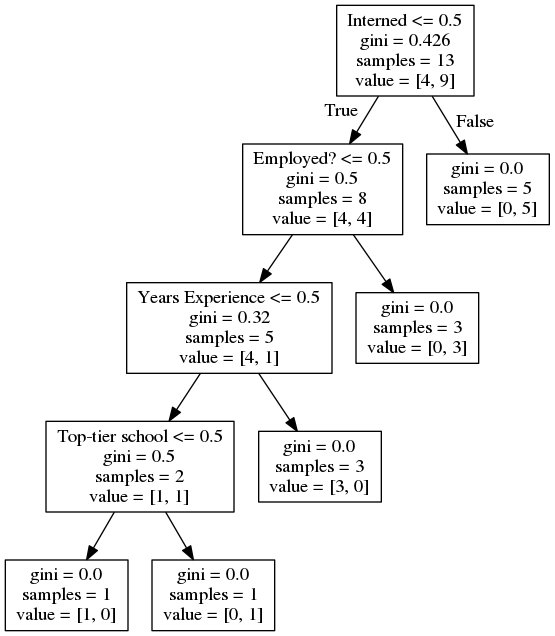

In [48]:
features = list(df.columns[:6])

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data, feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#  Iris DataSet

In [49]:
from sklearn.datasets import load_iris

In [56]:
iris = load_iris()
iris 

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [59]:
features = pd.DataFrame(iris['data'], columns=["Sepal length", "Sepal width", "Petal length", "Petal width"])

In [60]:
features.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
labels = pd.DataFrame(iris['target'], columns=["label"])

In [63]:
labels.head()

,label
0,0
1,0
2,0
3,0
4,0


In [64]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

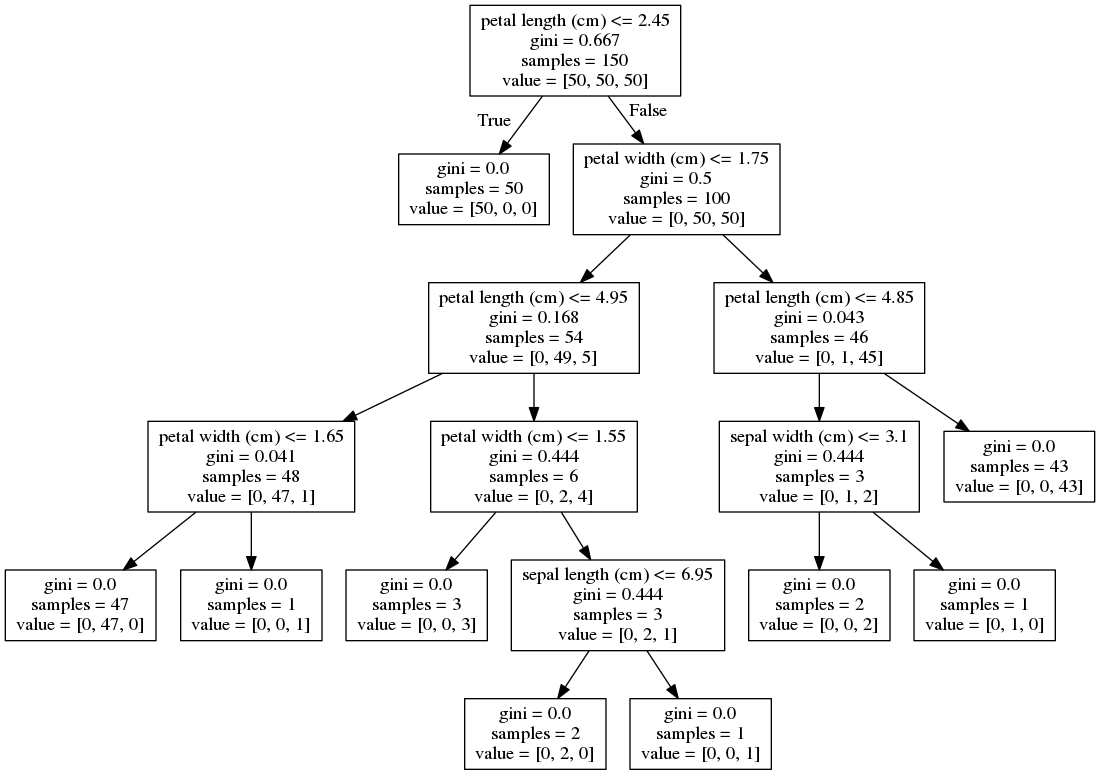

In [65]:
iris_features = iris['feature_names']
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data, feature_names=iris_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())